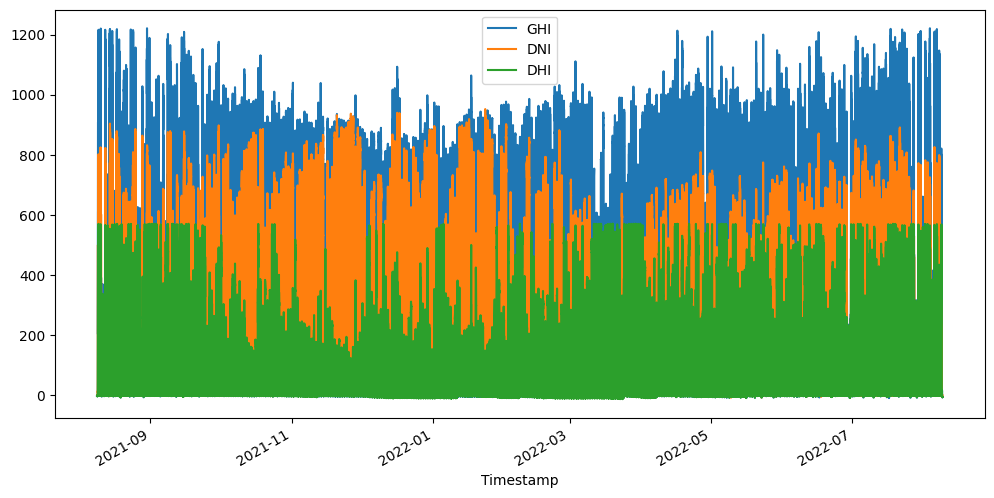

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

df = pd.read_csv("../data/benin-malanville.csv")
df.describe()
df.isna().sum()


columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = df[columns].apply(zscore)
outliers = (z_scores.abs() > 3).any(axis=1)

numeric_cols = df.select_dtypes(include='number').columns
df_cleaned = df[~outliers].copy()
df_cleaned[numeric_cols] = df_cleaned[numeric_cols].fillna(df[numeric_cols].median())



df_cleaned['Timestamp'] = pd.to_datetime(df_cleaned['Timestamp'])
df_cleaned.set_index('Timestamp')[['GHI', 'DNI', 'DHI']].plot(figsize=(12,6))


df_cleaned.to_csv("../data/benin-malanville.csv", index=False)

